In [1]:
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt



from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [10]:


# Load the data from the CSV file
file_path = 'Excel_Files/blob_positions.csv'
data = pd.read_csv(file_path)

# Clasificación para la columna 'X'
bins_x = [0, 100, 200, 400]
labels_x = [0, 1, 2]
data['X_class'] = pd.cut(data['x'], bins=bins_x, labels=labels_x, include_lowest=True)

# Clasificación para la columna 'size'
bins_size = [0,15, 100]
labels_size = [0, 1]
data['size_class'] = pd.cut(data['size'], bins=bins_size, labels=labels_size, include_lowest=True)

# Define las condiciones para la nueva columna 'movement'
conditions = [
    (data['size_class'] == 0) & (data['X_class'] == 0),
    (data['size_class'] == 0) & (data['X_class'] == 1),
    (data['size_class'] == 0) & (data['X_class'] == 2),
    (data['size_class'] == 1) & (data['X_class'] == 0),
    (data['size_class'] == 1) & (data['X_class'] == 1),
    (data['size_class'] == 1) & (data['X_class'] == 2)
]

# Define las elecciones correspondientes a las condiciones No se mueve, izquierda, centro, derecha
choices = [0, 0,0,1, 2, 3]

# Crear la columna 'movement' utilizando np.select
data['movement'] = np.select(conditions, choices, default=0)  # Usamos default=0 por si hay alguna condición no contemplada

# Mostrar las primeras filas para verificar la nueva estructura
data.head(50)




,x,y,size,X_class,size_class,movement
0,207.620148,125.620155,5.385092,2,0,0
1,207.520828,125.381943,5.629910,2,0,0
2,207.294876,125.391029,5.715354,2,0,0
3,207.266663,125.500000,5.581267,2,0,0
4,207.346664,125.306664,5.609438,2,0,0
5,207.346161,126.551285,7.221944,2,0,0
6,206.996262,126.936333,7.872663,2,0,0
7,207.141846,126.748230,7.883366,2,0,0
8,206.996628,126.962959,8.222013,2,0,0
9,207.065979,127.062500,8.129488,2,0,0


In [3]:

# Features y Labels
X = data[['x', 'size']]
y = data['movement']
# Escalado de características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Modelo
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(4, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenamiento del modelo




C:\Users\yourk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))




Epoch 1/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3715 - loss: 1.4309 - val_accuracy: 0.7579 - val_loss: 0.9815
Epoch 2/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7065 - loss: 0.9543 - val_accuracy: 0.8360 - val_loss: 0.6443
Epoch 3/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7833 - loss: 0.7360 - val_accuracy: 0.8755 - val_loss: 0.4773
Epoch 4/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8260 - loss: 0.6179 - val_accuracy: 0.9229 - val_loss: 0.3833
Epoch 5/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8732 - loss: 0.4781 - val_accuracy: 0.9447 - val_loss: 0.3281
Epoch 6/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8978 - loss: 0.4364 - val_accuracy: 0.9625 - val_loss: 0.2891
Epoch 7/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8983 - loss: 0.3981 - val_accuracy: 0.9684 - val_loss: 0.2614
Epoch 8/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9150 - loss: 0.3806 - val_accuracy: 0.9773 - v

In [5]:

# Evaluación del modelo
_, train_accuracy = model.evaluate(X_train, y_train)
_, test_accuracy = model.evaluate(X_test, y_test)
print(f"Train Accuracy: {train_accuracy*100:.2f}%")
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step - accuracy: 0.9878 - loss: 0.1042
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 559us/step - accuracy: 0.9721 - loss: 0.1199
Train Accuracy: 98.69%
Test Accuracy: 98.52%


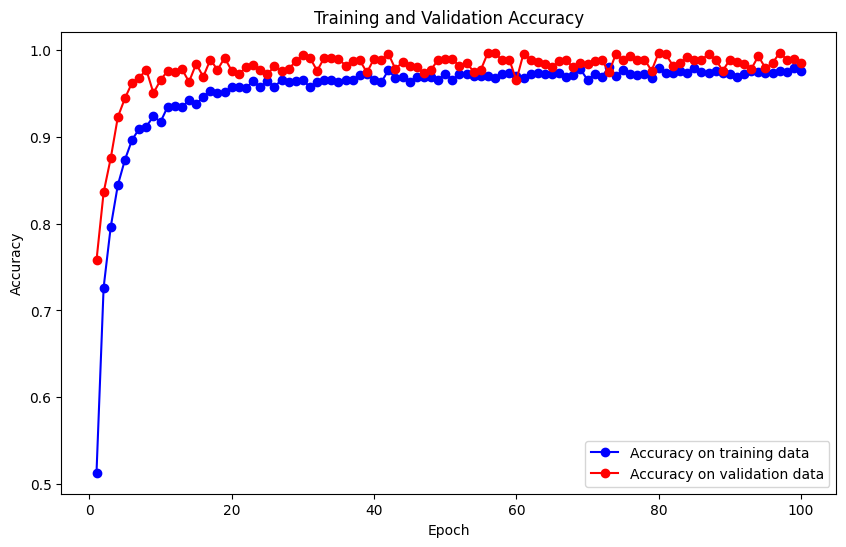

In [6]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, acc, 'bo-', label='Accuracy on training data')
plt.plot(epochs, val_acc, 'ro-', label='Accuracy on validation data')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

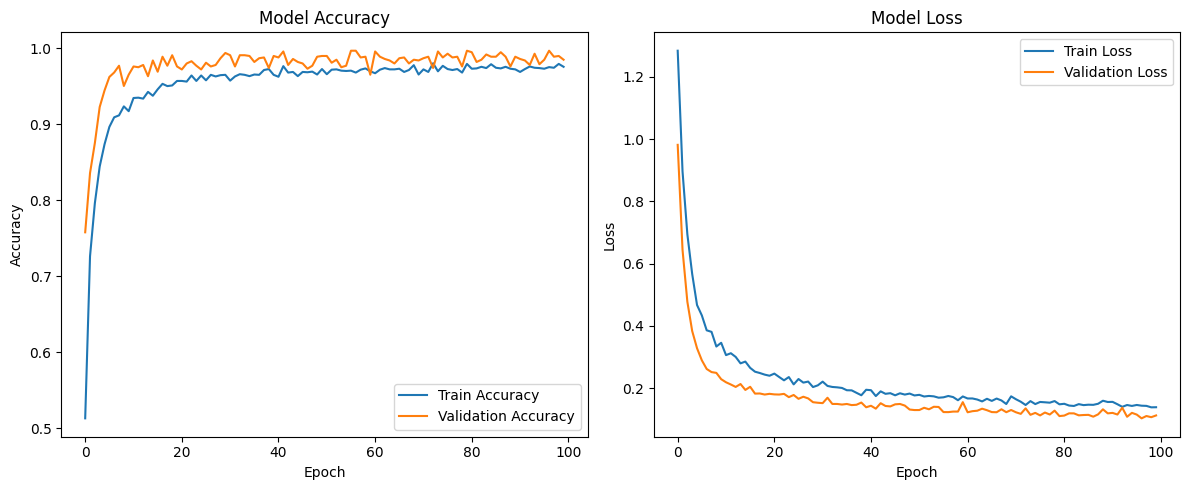

NameError: name 'conf_matrix' is not defined

<Figure size 800x600 with 0 Axes>

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [19]:
from joblib import dump, load


# Guardar el modelo completo en formato HDF5
model.save('Models\mi_modelo_completo.h5')
# Guardar el scaler
dump(scaler, 'Models\mi_scaler.joblib')




['mi_scaler.joblib']

In [16]:
# Supongamos que tienes los siguientes datos de prueba
x_nuevo = 0  # Un valor para 'x'
size_nuevo = 0  # Un valor para 'size'

# Debes aplicar el mismo escalamiento que usaste para los datos de entrenamiento
X_nuevo_scaled = scaler.transform([[x_nuevo, size_nuevo]])

# Realizar la predicción
prediccion = model.predict(X_nuevo_scaled)
predicted_class = np.argmax(prediccion, axis=1)

# Imagina que sabes el movimiento real para estos valores, digamos que es 2 (derecha)
real_movement = 2

print(f"Predicción del modelo: {predicted_class[0]} (Clase Predicha)")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicción del modelo: 0 (Clase Predicha)
Valor real: 2 (Clase Real)


C:\Users\yourk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
